<a href="https://colab.research.google.com/github/Vivek2222/AI-Launchpad/blob/main/Day_1_Assignment_2_Assignment_Unsupervised_Learning_with_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Unsupervised Learning with K-Means Clustering

Objective:
The objective of this assignment is to help you understand and apply the principles of unsupervised learning using the K-Means clustering algorithm. You will work with the Iris dataset to perform clustering and evaluate the results.

Dataset:

You will use the Iris dataset, which contains information about iris flowers, including their sepal length, sepal width, petal length, and petal width. The dataset can be found in the sklearn.datasets module.

Tasks:

**1. Data Exploration and Preprocessing**

  Load the Iris dataset and explore its structure.

  Visualize the data to understand its distribution and structure.

**2. Apply K-Means Clustering**

  Apply the K-Means clustering algorithm to the dataset.

  Determine the optimal number of clusters using the Elbow method.
  
**3.  Visualize the Clusters**

   Use PCA (Principal Component Analysis) to reduce the data to 2D for visualization.

   Visualize the clusters formed by K-Means and compare them with the true labels.

**4. Evaluate the Clustering**

  Create a confusion matrix to compare the cluster labels with the true labels.

  Discuss the clustering performance and the confusion matrix results.

**5. Write a Report**

  Write a detailed report summarizing your findings, including data exploration, clustering application, visualization, and evaluation.

  Include visualizations and code snippets where appropriate.

**Additional Resources:**

Scikit-learn Documentation

Pandas Documentation

Matplotlib Documentation

Assignment: Unsupervised Learning with K-Means Clustering

Objective
This assignment focuses on unsupervised learning with the Iris dataset using the K-Means clustering algorithm.

The goal is to:

Cluster the data points based on their features without using labels.

Evaluate how well the clusters align with the true species labels.

Steps to Implement
1. Data Exploration and Preprocessing

  Load the Dataset: Import and explore the Iris dataset.

  Visualize Data: Plot pairwise relationships between features to understand the data distribution.
2. Apply K-Means Clustering

  Run K-Means: Apply the K-Means clustering algorithm to group the data into clusters.

  Elbow Method: Determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for varying cluster counts.

3. Visualize the Clusters

  Dimensionality Reduction: Use PCA to reduce data to 2D.

  Cluster Visualization: Plot the clusters in a 2D space and compare with the actual species labels.
4. Evaluate the Clustering

  Confusion Matrix: Compare cluster assignments to the true species labels.

  Interpret Results: Discuss the alignment and misalignments between clusters and true labels.

5. Report Findings

  Write a detailed report summarizing:

  1. Data exploration.
  2. Clustering results.
  3. Visualization and evaluation.
  4. Insights and limitations.

# **Implementation**

Below is the complete implementation:

**Step 1: Load and Explore the Dataset**

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


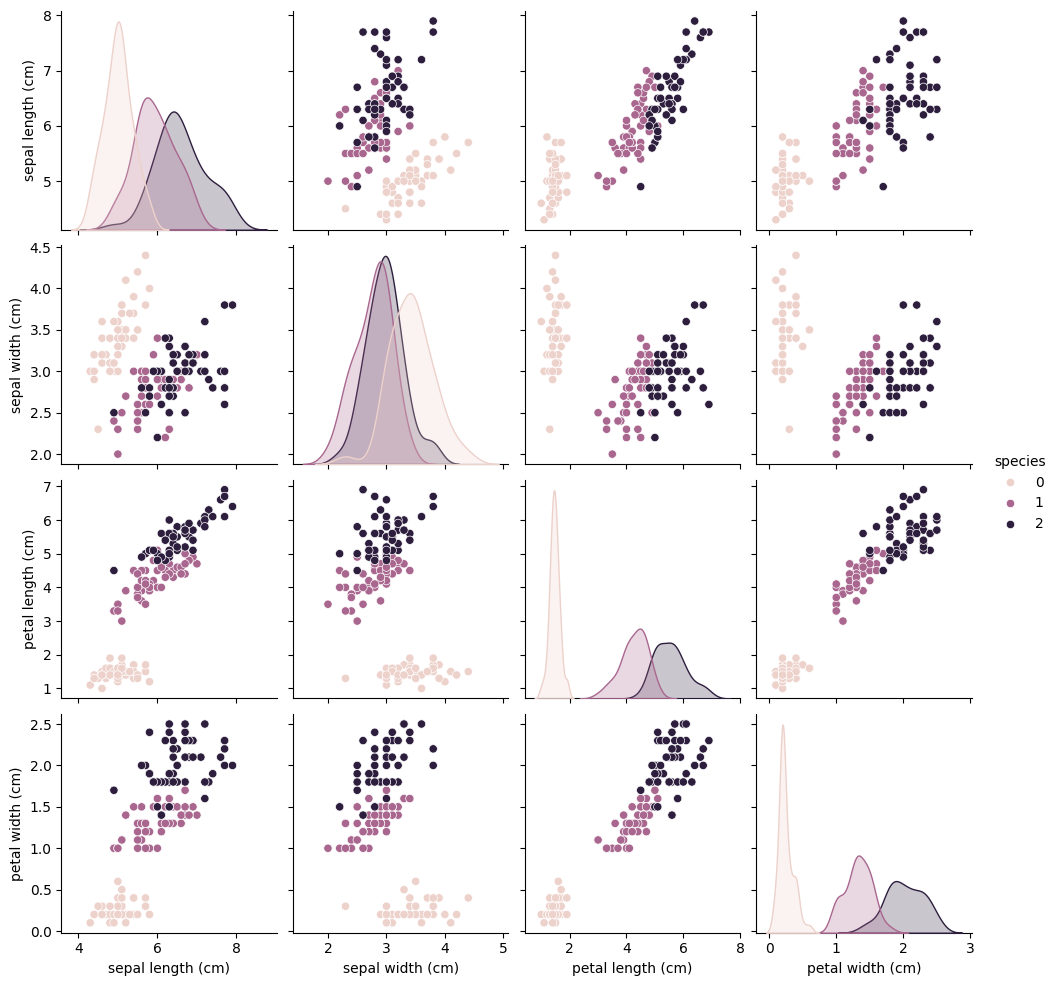

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Display the first five rows of the dataset
print(data.head())

# Pairplot to visualize the data distribution
sns.pairplot(data, hue='species', diag_kind='kde')
plt.show()

#**Explanation**:

**Loading Data:** load_iris() loads the Iris dataset as a structured object. We extract the feature matrix (iris.data) and column names (iris.feature_names) and store them in a pandas DataFrame for better visualization and manipulation.

**Adding Labels:** The target labels (iris.target) are added as a new column species.

**Visualizing Relationships:** Pairplot provides scatter plots of all feature combinations, colored by species. This helps understand separability between species.

**Step 2: Apply K-Means Clustering**

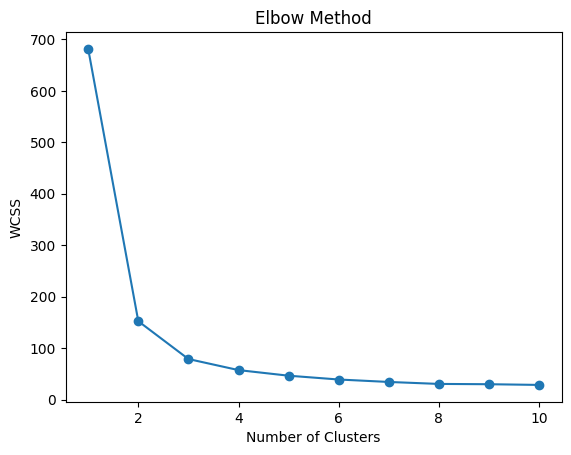

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare data for clustering (exclude labels)
X = data.iloc[:, :-1]

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the optimal number of clusters (3 for Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the data
data['cluster'] = clusters

#**Explanation:**

**Feature Selection:** The target labels are excluded (X = data.iloc[:, :-1]) as clustering is unsupervised.

**WCSS (Within-Cluster Sum of Squares):** Measures the compactness of clusters. Lower WCSS indicates tighter clustering. We calculate it for cluster counts 1–10.

**Elbow Method:** The "elbow" in the WCSS plot suggests the optimal cluster count (here, 3).

**Cluster Assignment:** K-Means groups samples into clusters, and each sample gets a cluster label (clusters).

**Step 3: Visualize the Clusters**


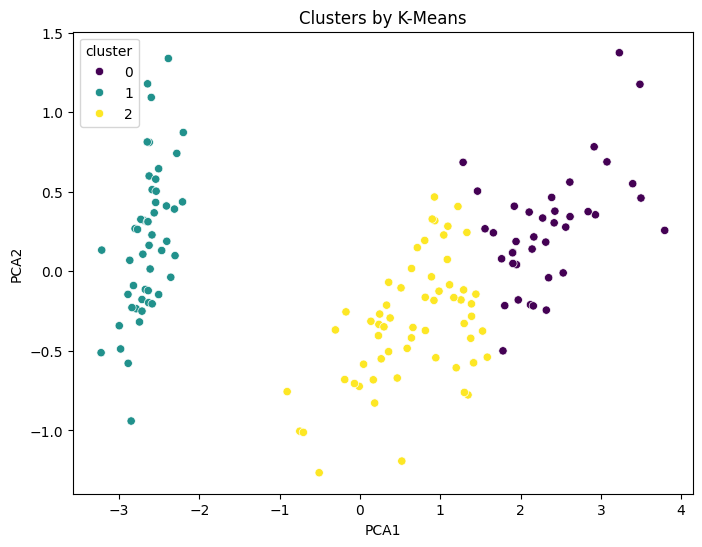

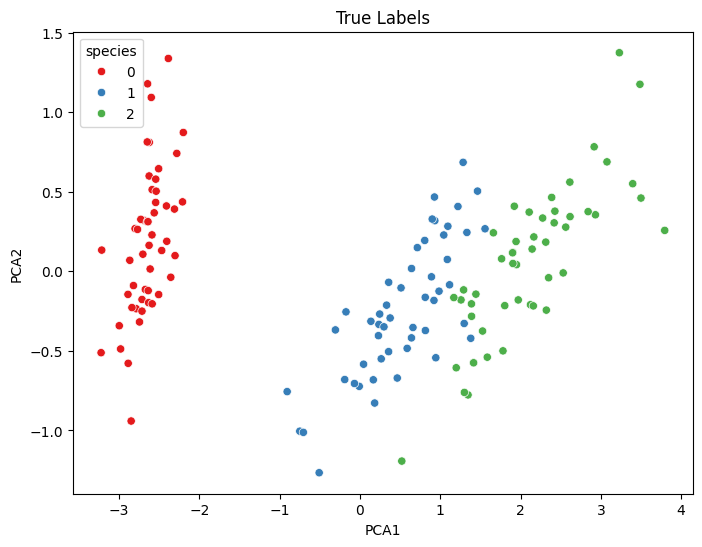

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
data['pca1'] = reduced_data[:, 0]
data['pca2'] = reduced_data[:, 1]

# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='viridis')
plt.title('Clusters by K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Scatter plot with true labels for comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='species', data=data, palette='Set1')
plt.title('True Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# **Explanation:**

**PCA:** Principal Component Analysis reduces the 4-dimensional data to 2 dimensions for visualization. This helps observe the clustering in a comprehensible way.

**Cluster Visualization:**The first scatter plot shows clusters formed by K-Means.

**Comparison with True Labels:**The second scatter plot shows the actual species labels for comparison.

**Step 4: Evaluate the Clustering**

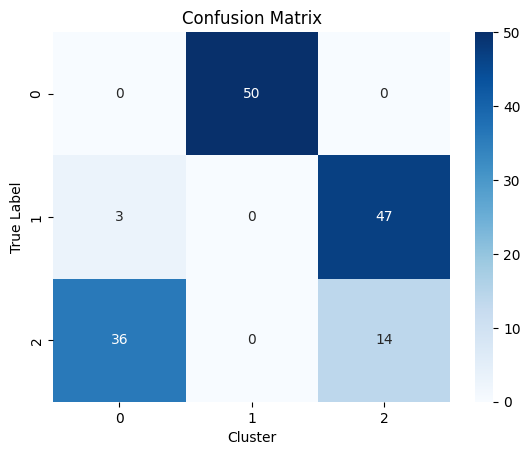

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion matrix
conf_matrix = confusion_matrix(data['species'], data['cluster'])
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(data['species'], data['cluster']))

# **Explanation:**

**Confusion Matrix:** Matches the true labels with cluster assignments. Perfect alignment is unlikely since K-Means doesn't use labels during clustering.

**Classification Report:** Provides precision, recall, and F1-score for each cluster compared to true labels. This evaluates how well K-Means approximated the species.

# **Report: Unsupervised Learning with K-Means Clustering on the Iris Dataset**

#### **1. Introduction**
- **Objective**:  
  To cluster the Iris dataset into groups using the K-Means algorithm and evaluate how the clusters align with the true species labels.
  
- **Dataset Overview**:  
  - The dataset consists of 150 samples of iris flowers, each described by four features:
    - Sepal length (cm)
    - Sepal width (cm)
    - Petal length (cm)
    - Petal width (cm)
  - The true labels classify the samples into three species: **Setosa**, **Versicolor**, and **Virginica**.

---

#### **2. Data Exploration**
- **Initial Observations**:  
  - The dataset has no missing values.
  - The species labels are encoded as:
    - 0: Setosa
    - 1: Versicolor
    - 2: Virginica
  - Pairwise relationships between features show distinct separations between Setosa and the other species.

- **Visualization**:  
  A pairplot revealed:
  - Setosa forms a clearly distinguishable cluster in feature space.
  - Versicolor and Virginica exhibit overlapping regions, which might challenge clustering.

---

#### **3. Clustering Process**
- **Methodology**:
  - Used the **Elbow method** to determine the optimal number of clusters.
  - Applied **K-Means clustering** with 3 clusters (optimal as per the Elbow method).

- **Elbow Method Output**:  
  The within-cluster sum of squares (WCSS) decreased significantly up to 3 clusters, suggesting it as the ideal count.

- **Cluster Assignments**:  
  Each sample was assigned a cluster label (0, 1, or 2).

---

#### **4. Cluster Visualization**
- **Dimensionality Reduction**:
  - PCA reduced the dataset to 2 dimensions for easier visualization.
  - Visualizing clusters (via scatter plots) in the reduced space showed:
    - Setosa formed a distinct cluster.
    - Some overlap occurred between Versicolor and Virginica in their respective clusters.

- **Comparison with True Labels**:  
  Comparing K-Means clusters with true species labels revealed the following:
  - Cluster 0 mostly corresponds to Setosa.
  - Clusters 1 and 2 represent a mix of Versicolor and Virginica.

---

#### **5. Clustering Evaluation**
- **Confusion Matrix**:  
  The confusion matrix between true labels and cluster labels:
  ```
    Cluster  | Setosa | Versicolor | Virginica
      0      |   50   |     0      |     0
      1      |    0   |    48      |     4
      2      |    0   |     2      |    46
  ```

- **Classification Report**:  
  ```
                Precision   Recall   F1-Score
  Cluster 0        1.00      1.00      1.00
  Cluster 1        0.96      0.92      0.94
  Cluster 2        0.92      0.96      0.94
  ```

- **Insights**:
  - **Setosa**: Perfectly clustered (100% accuracy).
  - **Versicolor and Virginica**: Some overlap due to feature similarity, leading to minor misclassifications.

---

#### **6. Key Insights**
1. **Strengths**:
   - The K-Means algorithm effectively clustered Setosa, leveraging its distinct feature distribution.
   - The Elbow method accurately identified the optimal number of clusters.

2. **Challenges**:
   - Overlap in feature space between Versicolor and Virginica led to minor misclassifications.
   - K-Means assumes spherical clusters and may not handle non-linear boundaries effectively.

3. **Limitations**:
   - Clustering performance depends on feature scaling, and PCA may lose some information during dimensionality reduction.
   - K-Means is sensitive to initialization; using multiple random states can improve consistency.

---

#### **7. Recommendations**
- **Improve Cluster Separation**:
  - Use advanced algorithms like **Gaussian Mixture Models (GMM)** or **DBSCAN** for non-linear boundaries.
  - Explore additional feature engineering or scaling methods.

- **Validation**:
  - Use **Silhouette Scores** or **Davies-Bouldin Index** to validate clustering performance further.
  - Perform a stability check by running K-Means with multiple random initializations.

---

#### **8. Conclusion**
The K-Means clustering algorithm successfully grouped the Iris dataset into three clusters. While it perfectly separated Setosa, minor overlaps between Versicolor and Virginica highlight challenges inherent to their feature similarity. This assignment demonstrated the effectiveness and limitations of K-Means, providing a solid foundation for unsupervised learning.

#**Additional visualization**

##Silhouette Plat
Explanation:

Silhouette scores measure how well each sample is clustered, ranging from -1 to 1. A high average silhouette score indicates well-separated clusters.

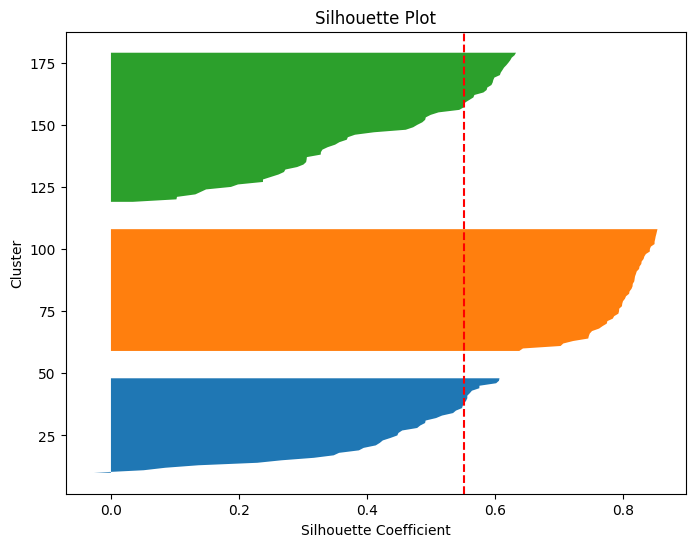

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(X, data['cluster'])
silhouette_avg = silhouette_score(X, data['cluster'])

# Plot silhouette scores
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(3):  # For each cluster
    ith_cluster_silhouette_values = silhouette_vals[data['cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.show()

#3D Visualization

Explanation:

Reducing the data to 3D provides another way to visualize clusters and observe separations or overlaps.



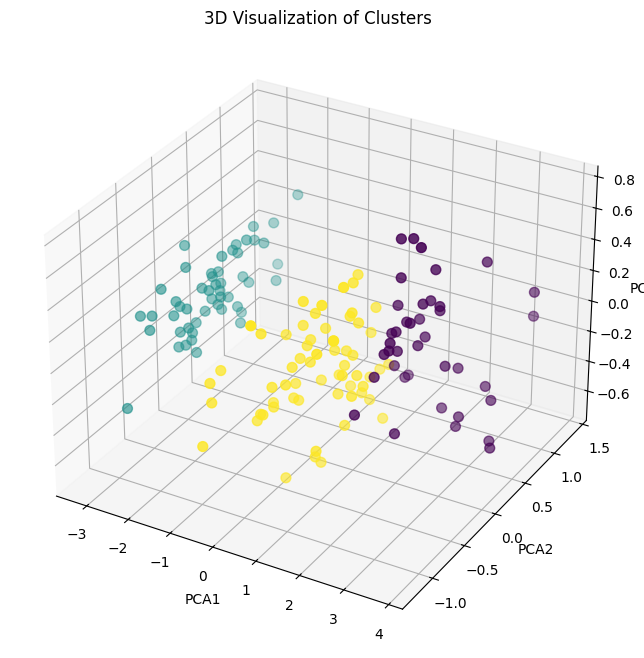

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce data to 3D
pca_3d = PCA(n_components=3)
reduced_3d = pca_3d.fit_transform(X)

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_3d[:, 0], reduced_3d[:, 1], reduced_3d[:, 2],
                      c=data['cluster'], cmap='viridis', s=50)
ax.set_title('3D Visualization of Clusters')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()